In [24]:
References: https://github.com/CGrannan/building-boardgame-recommendation-systems
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import TruncatedSVD

In [2]:
user_df = pd.read_csv('user_ratings.csv')
games_df = pd.read_csv('games.csv')

In [4]:
rating_limit.Username.value_counts()

Username
oldgoat3769967    6493
warta             6247
leffe dubbel      6047
TomVasel          5706
Doel              5226
                  ... 
bartonv            100
kingcat123         100
ericgaca           100
adityaraut         100
Petrus Lugduni     100
Name: count, Length: 48395, dtype: int64

In [5]:
rating_limit.BGGId.value_counts()

BGGId
30549     36203
822       35686
68448     34521
13        33454
36218     31647
          ...  
318996        3
349161        2
170608        1
292961        1
236332        1
Name: count, Length: 21924, dtype: int64

In [7]:
rating_limit = user_df[user_df['Username'].map(user_df['Username'].value_counts()) >= 100]
rating_limit.Rating = round(rating_limit.Rating, 0)
rating_limit = rating_limit[rating_limit['BGGId'].map(rating_limit['BGGId'].value_counts()) >= 200]
rating_limit = rating_limit[rating_limit['Rating'].map(rating_limit['Rating'].value_counts()) >= 8]

C:\Users\JER\AppData\Local\Temp\ipykernel_28120\1478136687.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_limit.Rating = round(rating_limit.Rating, 0)


In [8]:
rating_limit['Username'] = rating_limit['Username'].astype('category')
rating_limit['Username'] = rating_limit['Username'].cat.codes

In [9]:
rating_limit = rating_limit.fillna(0)
rating_limit

,BGGId,Rating,Username
849332,30549,4.0,42364
849335,30549,4.0,25795
849344,30549,4.0,46523
849348,30549,4.0,11074
849359,30549,4.0,5546
...,...,...,...
18910033,202207,6.0,6014
18910034,202207,6.0,25837
18910035,202207,6.0,11939
18910036,202207,6.0,28216


In [10]:
rating_pvt = pd.pivot_table(rating_limit, values='Rating', index='BGGId', columns='Username')
rating_pvt.head()

Username,0,1,2,3,4,5,6,7,8,9,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
BGGId,,,,,,,,,,,,,,,,,,,,,
1,NaN,5.0,NaN,NaN,NaN,9.0,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,5.0,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,4.0,8.0,9.0,NaN,6.0,NaN,NaN,NaN,NaN,...,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
5,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,6.0,5.0,7.0,NaN,8.0,NaN,NaN


In [13]:
# calculate the mean
user_pvt = rating_pvt.copy()
user_pvt['mean'] = user_pvt.mean(axis=1)

# subtract mean
user_pvt = user_pvt.subtract(user_pvt['mean'], axis=0)

# fill missing values
user_pvt = user_pvt.fillna(0)
user_pvt.drop(['mean'], axis=1, inplace=True)

user_pvt

Username,0,1,2,3,4,5,6,7,8,9,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
BGGId,,,,,,,,,,,,,,,,,,,,,
1,0.0,-2.601482,0.000000,0.000000,0.0,1.398518,0.0,0.0,0.0,1.398518,...,0.000000,0.0,0.0,0.000000,-0.601482,0.000000,0.0,-2.601482,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,0.0,-3.406427,0.593573,1.593573,0.0,-1.406427,0.0,0.0,0.0,0.000000,...,0.593573,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,-0.542587,0.000000,0.0,0.000000,0.0,0.0
5,0.0,-0.312653,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,-0.312653,0.0,0.0,-1.312653,-2.312653,-0.312653,0.0,0.687347,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342942,0.0,0.000000,0.387441,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,-0.612559,0.0,0.000000,0.0,0.0
343562,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
343905,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0


In [14]:
game_id_pvt = user_pvt.reset_index()
game_id_pvt.head()

Username,BGGId,0,1,2,3,4,5,6,7,8,...,48384,48385,48386,48387,48388,48389,48390,48391,48392,48393
0,1,0.0,-2.601482,0.000000,0.000000,0.0,1.398518,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,-0.601482,0.000000,0.0,-2.601482,0.0,0.0
1,2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
2,3,0.0,-3.406427,0.593573,1.593573,0.0,-1.406427,0.0,0.0,0.0,...,0.593573,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0
3,4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.000000,-0.542587,0.000000,0.0,0.000000,0.0,0.0
4,5,0.0,-0.312653,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,-0.312653,0.0,0.0,-1.312653,-2.312653,-0.312653,0.0,0.687347,0.0,0.0


In [18]:
def get_knn_recommendations(game_name, model, stats_df, pvt_table, pvt_table2):
    '''
    Returns recommendations from KNN recommendation system.
    
    Parameters:
    game-name - name of boardgame to be compared.
    model - NearestNeighbors model used to make recommendations.
    stats_df - Statistics dataframe, used to pull names.
    pvt_table - Matrix with game IDs, used to find indices. 
    pvt_table2 - Matrix of ratings used to find similarity.
    
    Returns:
    Names of 5 games most similarly rated to (game_name).
    '''
    game_id = stats_df[stats_df['Name'] == game_name].BGGId.item()
    game_index = pvt_table[pvt_table.BGGId == game_id].index
    distances, indices = model.kneighbors(pvt_table2.iloc[game_index, :].values.reshape(1, -1), n_neighbors = 11)

    names = []
    for index in indices[0]:
        rec_idx = pvt_table2.index[index]
        names.append(stats_df[stats_df['BGGId'] == rec_idx].Name.item())
    for i in range(0, len(distances.flatten())):
        if i == 0:
            print('Recommendations for {0}:\n'.format(game_name))
        else:
             print('{0}: {1}, with distance of {2}.'.format(i, names[i], distances.flatten()[i]))

In [16]:
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(user_pvt)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [20]:
get_knn_recommendations('Wingspan', model_knn, games_df, game_id_pvt, user_pvt)

Recommendations for Wingspan:

1: Everdell, with distance of 0.7679982775126497.
2: Viticulture Essential Edition, with distance of 0.7773400446390327.
3: Sagrada, with distance of 0.7863962107600997.
4: The Quacks of Quedlinburg, with distance of 0.7891704942072878.
5: Scythe, with distance of 0.7949727650515745.
6: Azul, with distance of 0.7974772085460794.
7: Tapestry, with distance of 0.8110140344629027.
8: Architects of the West Kingdom, with distance of 0.8131831771800129.
9: Terraforming Mars, with distance of 0.81475979664816.
10: Raiders of the North Sea, with distance of 0.827079846775792.


In [22]:
get_knn_recommendations('Clans of Caledonia', model_knn, games_df, game_id_pvt, user_pvt)

Recommendations for Clans of Caledonia:

1: Teotihuacan: City of Gods, with distance of 0.8085651216758598.
2: Great Western Trail, with distance of 0.8183568676218471.
3: La Granja, with distance of 0.8188242571564954.
4: Lorenzo il Magnifico, with distance of 0.821337142877145.
5: Yokohama, with distance of 0.8233084107040888.
6: Coimbra, with distance of 0.8254814069034966.
7: Mombasa, with distance of 0.8262823380206927.
8: Orléans, with distance of 0.8269135691071902.
9: The Voyages of Marco Polo, with distance of 0.8278738855301411.
10: Grand Austria Hotel, with distance of 0.8297952891177935.


In [61]:
def get_svd_recommendations(game_name, stats_df, pvt_table, pvt_table2):
    '''
    Returns recommendations from SVD recommendation system.
    
    Parameters:
    game-name - name of boardgame to be compared.
    stats_df - Statistics dataframe, used to pull names.
    pvt_table - Matrix of ratings used to find similarity.
    pvt_table2 - Matrix with game IDs, used to find indices. 
    
    Returns:
    Names of 5 games most similarly rated to (game_name).
    '''
    svd = TruncatedSVD(n_components=10)
    matrix = svd.fit_transform(pvt_table)
    corr = np.corrcoef(matrix)
    ids = pvt_table.index
    
    game_id = stats_df[stats_df['Name'] == game_name].BGGId.item()
    idx = pvt_table2[pvt_table2.BGGId == game_id].index[0]
    recs = list(ids[corr[idx] > .9])
    for game in recs:
        name = stats_df[stats_df['BGGId'] == game].Name.item()
        print(name)

In [62]:
get_svd_recommendations('Wingspan', games_df, user_pvt, game_id_pvt)

Raiders of the North Sea
Viticulture Essential Edition
Everdell
Clank!: A Deck-Building Adventure
Architects of the West Kingdom
Space Base
The Quacks of Quedlinburg
Istanbul: Big Box
Stone Age: Anniversary
Wingspan
The Isle of Cats
Raiders of Scythia
Lost Ruins of Arnak
7 Wonders (Second Edition)
Dune: Imperium
Everdell: Collector's Edition
Terraforming Mars: Ares Expedition
Ark Nova


In [63]:
data = pd.DataFrame(matrix, columns=['SVD Component 1', 
                                     'SVD Component 2',
                                     'SVD Component 3', 
                                     'SVD Component 4',
                                     'SVD Component 5', 
                                     'SVD Component 6',
                                     'SVD Component 7',
                                     'SVD Component 8',
                                     'SVD Component 9',
                                     'SVD Component 10'])

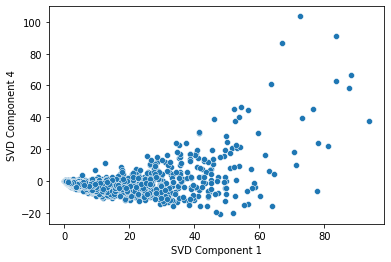

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=data, x='SVD Component 1', y='SVD Component 4')
plt.show()

In [66]:
data

,SVD Component 1,SVD Component 2,SVD Component 3,SVD Component 4,SVD Component 5,SVD Component 6,SVD Component 7,SVD Component 8,SVD Component 9,SVD Component 10
0,16.519215,-16.848891,-7.656652,1.287635,1.695018,-3.393488,1.106081,-6.354569,2.913553,3.771078
1,1.719563,-1.738985,0.645981,-0.953259,-0.534995,0.316266,0.249355,0.361444,0.624951,-0.255282
2,28.617160,-19.537403,-0.033660,12.155875,-8.110084,-8.666364,2.784583,-16.278697,-0.605392,-0.410910
3,1.826816,-2.486477,0.094627,-0.493217,-0.978662,0.457498,-0.410154,-0.956498,0.388681,-0.235512
4,26.762130,-12.703183,8.907648,10.762656,-5.474863,-2.948139,3.837641,-16.068840,2.054583,1.028437
...,...,...,...,...,...,...,...,...,...,...
6848,0.214975,0.226763,-0.116099,-0.022109,-0.033345,0.056554,0.060637,-0.137844,0.148780,-0.017507
6849,0.526568,0.342399,-0.251641,-0.372034,-0.314801,0.104036,0.194925,0.095569,0.321364,0.305227
6850,0.601326,0.309926,-0.755358,-0.034429,-0.489713,0.539768,0.029003,-0.231386,0.309919,-0.072815
6851,1.035248,0.727476,-0.071226,-0.290730,-0.739669,0.251469,0.074112,0.061252,0.510006,0.270803
